<a href="https://colab.research.google.com/github/HuanAII/Excercise/blob/main/excercise_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)#sinh ra cac day so ngau nhien khong giong nhau
#%matplotlib inline #yêu cầu Matplotlib hiển thị các biểu đồ trực tiếp bên trong notebook

In [2]:
#xu ly data
def load_data_from_file(filename="advertising.csv"):
   data=np.genfromtxt('/content/advertising.csv',delimiter=',',skip_header=1)
   N=data.shape[0]
   features_X=data[:,:3]
   sales_Y=data[:,3]
   features_X = np.hstack((np.ones((N, 1)), features_X))
   return features_X,sales_Y

In [87]:
#baitap2
def create_individual(n=4, bound=10):
    individual = [np.random.uniform(-bound/2, bound/2) for i in range(n)]
    return individual

In [109]:
#baitap3
features_X,sales_Y=load_data_from_file("/content/advertising.csv")
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
  loss=compute_loss(individual)
  fitness=1/(loss+1)
  return fitness

features_X , sales_Y = load_data_from_file ()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness ( individual )
print ( fitness_score )

1.0185991537088997e-06


In [111]:
#baitap4
def crossover(individual1, individual2, crossover_rate= 0.9 ):#lai tao
  individual1_new=individual1.copy()
  individual2_new=individual2.copy()
  for i in range(len(individual1)):
    if random.random()<crossover_rate:
      individual1_new[i]=individual2[i]
      individual2_new[i]=individual1[i]
  return individual1_new,individual2_new

individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )


 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


In [59]:
#baitap5
def mutate(individual, mutation_rate=0.05):
    individual_new = individual.copy()  # Create a copy of the individual
    for i in range(len(individual_new)):
        # Check if a random number is less than the mutation rate
        if random.random() < mutation_rate:
            # Mutate the gene (you can customize this mutation logic as needed)
            individual_new[i] = individual_new[i] + random.uniform(-1, 1)  # Example: random float between -1 and 1
    return individual_new

before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate ( individual , mutation_rate = 2.0)
print ( before_individual == after_individual )

False


In [35]:
#baitap6
def initializePopulation ( m ) :
  population = [ create_individual () for _ in range ( m ) ]
  return population

In [132]:
#baitap7
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [129]:
#baitap8
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m - 1]), "with chromosome:", sorted_population[m - 1])

    new_population = []

    while len(new_population) < m - elitism:
        individual1 = selection(sorted_population,m)
        individual2 = selection(sorted_population,m)

        individual1, individual2 = crossover(individual1, individual2)

        individual1 = mutate(individual1)
        individual2 = mutate(individual2)

        new_population.append(individual1)
        new_population.append(individual2)

    for ind in sorted_population[m - elitism:]:

        new_population.append(ind.copy())
    return new_population, compute_loss(sorted_population[m - 1])


individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

Best loss: 123415.051528805 with chromosome: [3.44, 2.57, -0.79, -2.41]


In [133]:
#baitap9
def run_GA():
  n_generations = 100
  m = 600
  features_X , sales_Y = load_data_from_file ()
  population = initializePopulation (m)
  losses_list = []
  for i in range ( n_generations ) :
    print ("Generation : " , i)
    print (population[-2])
    population , losses = create_new_population(population,2,i)
    losses_list.append(losses)
  return losses_list , population

losses_list , population = run_GA ()

Generation :  0
[3.8981351064324166, 0.5011836365991247, -2.2378619155828594, 3.1416601364000574]
Best loss: 18.75816704807087 with chromosome: [0.8782419675837296, 0.05173774223072947, 0.3124905209594422, 0.044077811255053057]
Generation :  1
[-1.625000066712139, 0.051966245419279744, -0.24672089086395754, 0.7883420523263016]
Best loss: 18.75816704807087 with chromosome: [0.8782419675837296, 0.05173774223072947, 0.3124905209594422, 0.044077811255053057]
Generation :  2
[0.8782419675837296, 0.05173774223072947, 0.3124905209594422, 0.044077811255053057]
Best loss: 18.75816704807087 with chromosome: [0.8782419675837296, 0.05173774223072947, 0.3124905209594422, 0.044077811255053057]
Generation :  3
[0.8782419675837296, 0.05173774223072947, 0.3124905209594422, 0.044077811255053057]
Best loss: 12.194428823729858 with chromosome: [0.8782419675837296, 0.05173774223072947, 0.3124905209594422, -0.0015191588009262347]
Generation :  4
[0.8782419675837296, 0.05173774223072947, 0.3124905209594422, 

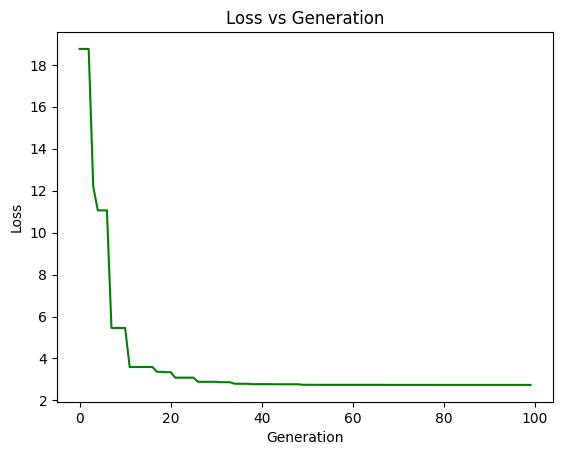

In [134]:
# bai 10
def visualize_loss(losses_list):
  plt.plot(losses_list,c='green')
  plt.xlabel('Generation')
  plt.ylabel('Loss')
  plt.title('Loss vs Generation')
  plt.show()
visualize_loss(losses_list)

[4.800661717444681, 0.05259590962590899, 0.1133196805055352, -0.0015191588009262347]


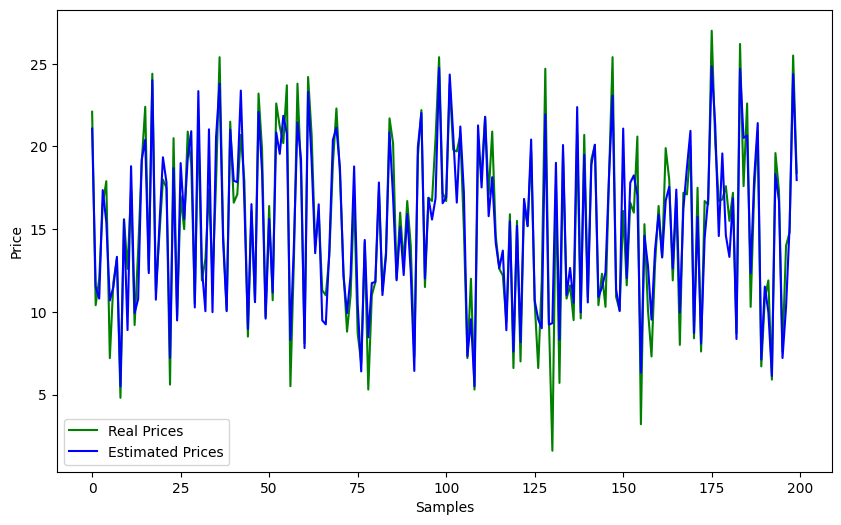

In [135]:
#bai11
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1]) #lay ra bo theta bestloss
  estimated_prices = features_X.dot(theta)
  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()